# 前向传播
指的是：按顺序（从输入层到输出层）计算和存储神经网络中每层的结果
为了简单起见，我们假设输入样本是 $\mathbf{x}\in \mathbb{R}^d$，
并且我们的隐藏层不包括偏置项。
这里的中间变量是：

$$\mathbf{z}= \mathbf{W}^{(1)} \mathbf{x},$$

其中$\mathbf{W}^{(1)} \in \mathbb{R}^{h \times d}$
是隐藏层的权重参数。
将中间变量$\mathbf{z}\in \mathbb{R}^h$通过激活函数$\phi$后，
我们得到长度为$h$的隐藏激活向量：

$$\mathbf{h}= \phi (\mathbf{z}).$$

隐藏变量$\mathbf{h}$也是一个中间变量。
假设输出层的参数只有权重$\mathbf{W}^{(2)} \in \mathbb{R}^{q \times h}$，
我们可以得到输出层变量，它是一个长度为$q$的向量：

$$\mathbf{o}= \mathbf{W}^{(2)} \mathbf{h}.$$

假设损失函数为$l$，样本标签为$y$，我们可以计算单个数据样本的损失项，

$$L = l(\mathbf{o}, y).$$

根据$L_2$正则化的定义，给定超参数$\lambda$，正则化项为

$$s = \frac{\lambda}{2} \left(\|\mathbf{W}^{(1)}\|_F^2 + \|\mathbf{W}^{(2)}\|_F^2\right),$$
:eqlabel:`eq_forward-s`

其中矩阵的Frobenius范数是将矩阵展平为向量后应用的$L_2$范数。
最后，模型在给定数据样本上的正则化损失为：

$$J = L + s.$$

在下面的讨论中，我们将$J$称为*目标函数*（objective function）。
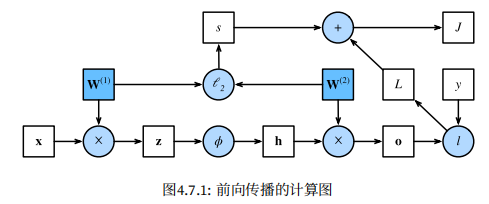

# 反向传播
*反向传播*（backward propagation或backpropagation）指的是计算神经网络参数梯度的方法。
简言之，该方法根据微积分中的*链式规则*，按相反的顺序从输出层到输入层遍历网络。存储了计算某些参数梯度是所需的中间变量（偏导数）
假设我们有函数$\mathsf{Y}=f(\mathsf{X})$和$\mathsf{Z}=g(\mathsf{Y})$，
其中输入和输出$\mathsf{X}, \mathsf{Y}, \mathsf{Z}$是任意形状的张量。
利用链式法则，我们可以计算$\mathsf{Z}$关于$\mathsf{X}$的导数

$$\frac{\partial \mathsf{Z}}{\partial \mathsf{X}} = \text{prod}\left(\frac{\partial \mathsf{Z}}{\partial \mathsf{Y}}, \frac{\partial \mathsf{Y}}{\partial \mathsf{X}}\right).$$

在这里，我们使用$\text{prod}$运算符在执行必要的操作（如换位和交换输入位置）后将其参数相乘。
对于向量，这很简单，它只是矩阵-矩阵乘法。
对于高维张量，我们使用适当的对应项。
运算符$\text{prod}$指代了所有的这些符号。

回想一下，在计算图 :numref:`fig_forward`中的单隐藏层简单网络的参数是
$\mathbf{W}^{(1)}$和$\mathbf{W}^{(2)}$。
反向传播的目的是计算梯度$\partial J/\partial \mathbf{W}^{(1)}$和
$\partial J/\partial \mathbf{W}^{(2)}$。
为此，我们应用链式法则，依次计算每个中间变量和参数的梯度。
计算的顺序与前向传播中执行的顺序相反，因为我们需要从计算图的结果开始，并朝着参数的方向努力。第一步是计算目标函数$J=L+s$相对于损失项$L$和正则项$s$的梯度。

$$\frac{\partial J}{\partial L} = 1 \; \text{and} \; \frac{\partial J}{\partial s} = 1.$$

接下来，我们根据链式法则计算目标函数关于输出层变量$\mathbf{o}$的梯度：

$$
\frac{\partial J}{\partial \mathbf{o}}
= \text{prod}\left(\frac{\partial J}{\partial L}, \frac{\partial L}{\partial \mathbf{o}}\right)
= \frac{\partial L}{\partial \mathbf{o}}
\in \mathbb{R}^q.
$$

接下来，我们计算正则化项相对于两个参数的梯度：

$$\frac{\partial s}{\partial \mathbf{W}^{(1)}} = \lambda \mathbf{W}^{(1)}
\; \text{and} \;
\frac{\partial s}{\partial \mathbf{W}^{(2)}} = \lambda \mathbf{W}^{(2)}.$$

现在我们可以计算最接近输出层的模型参数的梯度
$\partial J/\partial \mathbf{W}^{(2)} \in \mathbb{R}^{q \times h}$。
使用链式法则得出：

$$\frac{\partial J}{\partial \mathbf{W}^{(2)}}= \text{prod}\left(\frac{\partial J}{\partial \mathbf{o}}, \frac{\partial \mathbf{o}}{\partial \mathbf{W}^{(2)}}\right) + \text{prod}\left(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial \mathbf{W}^{(2)}}\right)= \frac{\partial J}{\partial \mathbf{o}} \mathbf{h}^\top + \lambda \mathbf{W}^{(2)}.$$
:eqlabel:`eq_backprop-J-h`

为了获得关于$\mathbf{W}^{(1)}$的梯度，我们需要继续沿着输出层到隐藏层反向传播。
关于隐藏层输出的梯度$\partial J/\partial \mathbf{h} \in \mathbb{R}^h$由下式给出：

$$
\frac{\partial J}{\partial \mathbf{h}}
= \text{prod}\left(\frac{\partial J}{\partial \mathbf{o}}, \frac{\partial \mathbf{o}}{\partial \mathbf{h}}\right)
= {\mathbf{W}^{(2)}}^\top \frac{\partial J}{\partial \mathbf{o}}.
$$

由于激活函数$\phi$是按元素计算的，
计算中间变量$\mathbf{z}$的梯度$\partial J/\partial \mathbf{z} \in \mathbb{R}^h$
需要使用按元素乘法运算符，我们用$\odot$表示：

$$
\frac{\partial J}{\partial \mathbf{z}}
= \text{prod}\left(\frac{\partial J}{\partial \mathbf{h}}, \frac{\partial \mathbf{h}}{\partial \mathbf{z}}\right)
= \frac{\partial J}{\partial \mathbf{h}} \odot \phi'\left(\mathbf{z}\right).
$$

最后，我们可以得到最接近输入层的模型参数的梯度
$\partial J/\partial \mathbf{W}^{(1)} \in \mathbb{R}^{h \times d}$。
根据链式法则，我们得到：

$$
\frac{\partial J}{\partial \mathbf{W}^{(1)}}
= \text{prod}\left(\frac{\partial J}{\partial \mathbf{z}}, \frac{\partial \mathbf{z}}{\partial \mathbf{W}^{(1)}}\right) + \text{prod}\left(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial \mathbf{W}^{(1)}}\right)
= \frac{\partial J}{\partial \mathbf{z}} \mathbf{x}^\top + \lambda \mathbf{W}^{(1)}.
$$


# 训练神经网络
在训练神经网络时，前向传播和反向传播相互依赖。
对于前向传播，我们沿着依赖的方向遍历计算图并计算其路径上的所有变量。
然后将这些用于反向传播，其中计算顺序与计算图的相反。

以上述简单网络为例：一方面，在前向传播期间计算正则项
 :eqref:`eq_forward-s`取决于模型参数$\mathbf{W}^{(1)}$和
$\mathbf{W}^{(2)}$的当前值。
它们是由优化算法根据最近迭代的反向传播给出的。
另一方面，反向传播期间参数 :eqref:`eq_backprop-J-h`的梯度计算，
取决于由前向传播给出的隐藏变量$\mathbf{h}$的当前值。

因此，在训练神经网络时，在初始化模型参数后，
我们交替使用前向传播和反向传播，利用反向传播给出的梯度来更新模型参数。
注意，反向传播重复利用前向传播中存储的中间值，以避免重复计算。
带来的影响之一是我们需要保留中间值，直到反向传播完成。
这也是训练比单纯的预测需要更多的内存（显存）的原因之一。
此外，这些中间值的大小与网络层的数量和批量的大小大致成正比。
因此，使用更大的批量来训练更深层次的网络更容易导致*内存不足*（out of memory）错误。

## 小结

* 前向传播在神经网络定义的计算图中按顺序计算和存储中间变量，它的顺序是从输入层到输出层。
* 反向传播按相反的顺序（从输出层到输入层）计算和存储神经网络的中间变量和参数的梯度。
* 在训练深度学习模型时，前向传播和反向传播是相互依赖的。
* 训练比预测需要更多的内存。

## 练习

1. 假设一些标量函数$\mathbf{X}$的输入$\mathbf{X}$是$n \times m$矩阵。$f$相对于$\mathbf{X}$的梯度维数是多少？
1. 向本节中描述的模型的隐藏层添加偏置项（不需要在正则化项中包含偏置项）。
    1. 画出相应的计算图。
    1. 推导正向和反向传播方程。
1. 计算本节所描述的模型，用于训练和预测的内存占用。
1. 假设想计算二阶导数。计算图发生了什么？预计计算需要多长时间？
1. 假设计算图对当前拥有的GPU来说太大了。
    1. 请试着把它划分到多个GPU上。
    1. 与小批量训练相比，有哪些优点和缺点？

[Discussions](https://discuss.d2l.ai/t/5769)
